In [58]:
# import the required libraries
# from google.colab import drive
# drive.mount('/content/gdrive')
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from tqdm import tqdm
import cv2
from numpy.ma.core import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


In [78]:
reconstructed_model = keras.models.load_model('./best_model_3.h5')

In [79]:
def predict_the_image(imgg, x,y):
    org_img = imgg.copy()
    org_h, org_w = org_img.shape
    img = cv2.resize(org_img,(175, 175))  
    keys = reconstructed_model.predict(np.array([img/255.0]), verbose=0)
    keys = keys.reshape(-1,2)
    keys=keys *175
    keys = keys * [org_w /175,  org_h/175]
    keys = keys + [x,y]
    return keys

In [65]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [113]:
# import the opencv library
import cv2
import os

# define a video capture object
vid = cv2.VideoCapture(0)

while (True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    frame = cv2.flip(frame, 1)

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    max_area = 0
    max_face = 0,0,0,0
    for (x,y,w,h) in faces:
        area = w*h
        if area > max_area:
            max_area = w*h
            max_face = x,y,w,h
      # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
    
    x,y,w,h = max_face
    if(w>0 and h>0):
        cropped_image = gray[y:y+h, x:x+w]
        keys = predict_the_image(cropped_image, x,y)
      # bbox_array = cv2.rectangle(bbox_array,(x-20,y-20),(x+w+20,y+h+20),(255,0,0),2)

        for i in keys:
            imggg = cv2.circle(frame, (int(i[0]),int(i[1])), radius=0, color=(0, 0, 255), thickness=3)

    # Display the resulting frame
        cv2.imshow('frame', imggg)
    else:
        cv2.imshow('frame', frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()


Image shape:  (1123, 3064, 4)


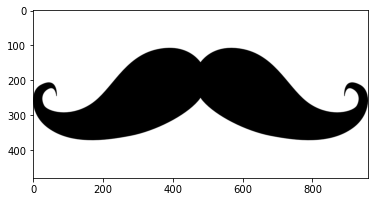

In [9]:
# load in sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('./fun_imgs/sunglasses.png', cv2.IMREAD_UNCHANGED)
hat = cv2.imread('./fun_imgs/straw_hat.png', cv2.IMREAD_UNCHANGED)
moustache = cv2.imread('./fun_imgs/moustache.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(moustache)

# print out its dimensions
print('Image shape: ', sunglasses.shape)

The alpha channel looks like this (black pixels = transparent): 


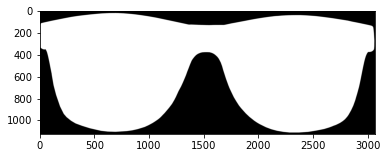

In [10]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')

In [11]:
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)

The non-zero values of the alpha channel are: 
(array([  17,   17,   17, ..., 1109, 1109, 1109], dtype=int64), array([ 687,  688,  689, ..., 2376, 2377, 2378], dtype=int64))


In [95]:
def wear_sunglasses(image, key_pts):
    # Display sunglasses on top of the image in the appropriate place

    # copy of the face image for overlay
    image_copy = np.copy(image)

    # top-left location for sunglasses to go
    # 17 = edge of left eyebrow
    x = int(key_pts[17, 0] * 0.95)
    y = int(key_pts[17, 1] * 0.975)

    # height and width of sunglasses
    # h = length of nose
    h = int(abs(key_pts[27,1] - key_pts[34,1])*1.25) 
    # w = left to right eyebrow edges
    w = int(abs(key_pts[17,0] - key_pts[26,0])*1.25)
    

    # read in sunglasses
    sunglasses = cv2.imread('fun_imgs/sunglasses.png', cv2.IMREAD_UNCHANGED)
    # resize sunglasses
    new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

    # get region of interest on the face to change
    roi_color = image_copy[y:y+h,x:x+w]

    # find all non-transparent pts
    ind = np.argwhere(new_sunglasses[:,:,3] > 0)

    # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
    for i in range(3):
        roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
    # set the area of the image to the changed region with sunglasses
    image_copy[y:y+h,x:x+w] = roi_color


    # display the result!
    return image_copy*1

In [116]:
def wear_moustache(image, key_pts):
    # Display moustache on top of the image in the appropriate place

    # copy of the face image for overlay
    image_copy = np.copy(image)

    # top-left location for moustache to go
    # 17 = edge of left eyebrow
    x = int(key_pts[49, 0]*0.87)
    y = int(key_pts[32, 1]*0.975)

    # height and width of moustache
    # h = length of nose
    h = int(abs(key_pts[34,1] - key_pts[63,1])*2.5) 
    # w = left to right eyebrow edges
    w = int(abs(key_pts[49,0] - key_pts[55,0])*3)
    

    # read in moustache
    moustache = cv2.imread('fun_imgs/moustache.png', cv2.IMREAD_UNCHANGED)
    # resize moustache
    new_moustache =  cv2.resize(moustache, (w, h), interpolation = cv2.INTER_CUBIC)

    # get region of interest on the face to change
    roi_color = image_copy[y:y+h,x:x+w]

    # find all non-transparent pts
    ind = np.argwhere(new_moustache[:,:,3] > 0)

    # for each non-transparent point, replace the original image pixel with that of the new_moustache
    for i in range(3):
        roi_color[ind[:,0],ind[:,1],i] = new_moustache[ind[:,0],ind[:,1],i]    
    # set the area of the image to the changed region with moustache
    image_copy[y:y+h,x:x+w] = roi_color


    # display the result!
    return image_copy*1

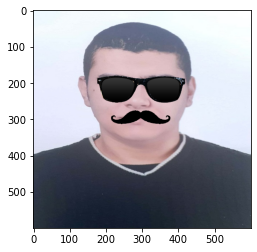

In [117]:
sunglasses = cv2.imread('./fun_imgs/sunglasses.png', cv2.IMREAD_UNCHANGED)

imggg = cv2.imread('./fun_imgs/finaal_img.jpg')
imggg = cv2.cvtColor(imggg, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(imggg, cv2.COLOR_RGB2GRAY)
keys = predict_the_image(gray,0,0)

img_with_glasses = wear_sunglasses(imggg, keys)
img_with_glasses_and_moustache= wear_moustache(img_with_glasses, keys)
plt.imshow( img_with_glasses_and_moustache)

# show_keypoints(gray, keys)

In [120]:
# import the opencv library
import cv2
import os

# define a video capture object
vid = cv2.VideoCapture(0)

while (True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    frame = cv2.flip(frame, 1)

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    max_area = 0
    max_face = 0,0,0,0
    for (x,y,w,h) in faces:
        area = w*h
        if area > max_area:
            max_area = w*h
            max_face = x,y,w,h
      # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
    
    x,y,w,h = max_face
    if(w>0 and h>0):
        cropped_image = gray[y:y+h, x:x+w]
        keys = predict_the_image(cropped_image, x,y)
      # bbox_array = cv2.rectangle(bbox_array,(x-20,y-20),(x+w+20,y+h+20),(255,0,0),2)

#         for i in keys:
#             imggg = cv2.circle(frame, (int(i[0]),int(i[1])), radius=0, color=(0, 0, 255), thickness=3)
        
        img_with_glasses = wear_sunglasses(frame, keys)
        img_with_glasses_and_moustache= wear_moustache(img_with_glasses, keys)

    # Display the resulting frame
        cv2.imshow('frame', img_with_glasses_and_moustache)
    else:
        cv2.imshow('frame', frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()
